# ITCS 6162: Data Mining - Programming Assignment

**In this assignment, you will explore data analysis, recommendation algorithms, and graph-based techniques using the MovieLens dataset. Your tasks will range from basic data exploration to advanced recommendation models, including:**
- Data manipulation with pandas
- User-item collaborative filtering
- Similarity-based recommendation models
- A Pixie-inspired Graph-based recommendation using adjacency lists with weighted random walks (without using NetworkX)


#### **Dataset Files:**
- **`u.data`**: User-movie ratings (`user_id  movie_id  rating  timestamp`)
- **`u.item`**: Movie metadata (`movie_id | title | release date | IMDB_website`)
- **`u.user`**: User demographics (`user_id | age | gender | occupation | zip_code`)

## **Part 1: Exploring and Cleaning Data**


We start by examining the structure of the MovieLens dataset files: `u.data`, `u.item`, and `u.user`.


### Inspecting the Dataset Format

The dataset is not in a traditional CSV format. To examine its structure, use the following shell command to display the first 10 lines of the file:

```sh
!head <file_name>


**In the cells given below. Write the code to read the files.**

In [1]:
# u.data
data = !head<u.data>

In [2]:
# u.item
item = !head<u.item>

In [3]:
# u.user
user = !head<u.user>

#### Loading the Dataset with Pandas

Use **pandas** to load the dataset into a DataFrame for analysis. Follow these steps:  

1. Import the necessary library: `pandas`.  
2. Use `pd.read_csv()` (or an appropriate function) to read the dataset file.  
3. Ensure the dataset is loaded with the correct delimiter (e.g., `','`, `'\t'`,`'|'` , or another separator if needed).  
4. Select and display the first few rows using `.head()`.

Ensure that:  

- The `ratings` dataset is read from `"u.data"` using tab (`'\t'`) as a separator and column names (`"user_id"`, `"movie_id"`, `"rating"` and `"timestamp"`).  
- The `movies` dataset is read from `"u.item"` using `'|'` as a separator, use columns (`0`, `1`, `2`), encoding (`"latin-1"`) and name the columns (`movie_id`, `title`, and `release_date`).  
- The `users` dataset is read from `"u.user"` using `'|'` as a separator, use columns (`0`, `1`, `2`, `3`) and name the columns (`user_id`, `age`, `gender`, and `occupation`).

In [4]:
# ratings
# Importing the pandas library for data manipulation
import pandas as pd
# Reading the ratings data from u.data
# Using tab as a separator since the file is tab-delimited
# Providing column names: user_id, movie_id, rating, and timestamp
ratings = pd.read_csv('u.data', sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [5]:
# Display the first 5 rows of the ratings dataset
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
# movies
# Reading movie data from u.item
# Using pipe (|) as a separator
# Only loading relevant columns: movie_id, title, release_date
# Encoding is set to latin-1 to avoid character decoding issues
movies = pd.read_csv('u.item', sep='|', header=None, usecols=[0, 1, 2], encoding='latin-1', names=['movie_id', 'title', 'release_date'])

In [7]:
# Display the first 5 rows of the movies dataset
movies.head()

,movie_id,title,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995


In [8]:
# users
# Reading user data from u.user
# Using pipe (|) as a separator
# Loading user_id, age, gender, and occupation columns
users = pd.read_csv('u.user', sep='|', header=None, usecols=[0, 1, 2, 3], names=['user_id', 'age', 'gender', 'occupation'])

In [9]:
# Display the first 10 rows of the users dataset
users.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


#### Saving the ratings DataFrame to a CSV file 

**Note:** As a **Bonus** task save the `ratings`, `movies` and `users` dataframe created into a `.csv` file format. <br>
**Hint:** Use the `to_csv()` function in pandas to save these DataFrames as CSV files.

In [10]:
# index=False ensures the DataFrame index is not saved as a separate column# ratings
ratings.to_csv('ratings.csv')

In [11]:
# movies
movies.to_csv('movies.csv')

In [12]:
# users
users.to_csv('users.csv')

**Display the first 10 rows of each file.**

In [13]:
# ratings
print("\nFirst 10 rows of ratings dataset - ")
ratings.head(10)


First 10 rows of ratings dataset - 


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [14]:
# movies
print("\nFirst 10 rows of movies dataset - ")
movies.head(10)


First 10 rows of movies dataset - 


,movie_id,title,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995
6,7,Twelve Monkeys (1995),01-Jan-1995
7,8,Babe (1995),01-Jan-1995
8,9,Dead Man Walking (1995),01-Jan-1995
9,10,Richard III (1995),22-Jan-1996


In [15]:
# users
print("\nFirst 10 rows of users dataset - ")
users.head(10)


First 10 rows of users dataset - 


,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
5,6,42,M,executive
6,7,57,M,administrator
7,8,36,M,administrator
8,9,29,M,student
9,10,53,M,lawyer


### Data Cleaning and Exploration with Pandas  

After loading the dataset, it’s important to clean and explore the data to ensure consistency and accuracy. Below are key **pandas** functions for cleaning and understanding the dataset.

#### 1. Handle Missing Values  
- `df.dropna()` – Removes rows with missing values.  
- `df.fillna(value)` – Fills missing values with a specified value.  

#### 2. Remove Duplicates  
- `df.drop_duplicates()` – Drops duplicate rows from the dataset.  

#### 3. Handle Incorrect Data Types  
- `df.astype(dtype)` – Converts columns to the appropriate data type.  

#### 4. Filter Outliers (if applicable)  
- `df[df['column_name'] > threshold]` – Filters rows based on a condition.  

#### 5. Rename Columns (if needed)  
- `df.rename(columns={'old_name': 'new_name'})` – Renames columns for clarity.  

#### 6. Reset Index  
- `df.reset_index(drop=True, inplace=True)` – Resets the index after cleaning.  

### Data Exploration Functions  

To better understand the dataset, use these **pandas** functions:  

- `df.shape` – Returns the number of rows and columns in the dataset.  
- `df.nunique()` – Displays the number of unique values in each column.  
- `df['column_name'].unique()` – Returns unique values in a specific column.  

**Example Usage in Pandas:**  
```python
import pandas as pd

# Load dataset
df = pd.read_csv("your_file.csv")

# Drop missing values
df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Convert 'timestamp' column to datetime format
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])

# Display dataset shape
print("Dataset shape:", df_cleaned.shape)

# Display number of unique values in each column
print("Unique values per column:\n", df_cleaned.nunique())

# Display unique movie IDs
print("Unique movie IDs:", df_cleaned['movie_id'].unique()[:10])  # Show first 10 unique movie IDs


**Note:** The functions mentioned above are some of the widely used **pandas** functions for data cleaning and exploration. However, it is not necessary that all of these functions will be required in the exercises below. Use them as needed based on the dataset and the specific tasks.

**Convert Timestamps into Readable dates.**

In [16]:
# ratings
# Convert the 'timestamp' column in the ratings DataFrame to datetime format
ratings['timestamp']= pd.to_datetime(ratings['timestamp'])

In [17]:
# Display the first 5 rows to verify timestamp conversion
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,1970-01-01 00:00:00.881250949
1,186,302,3,1970-01-01 00:00:00.891717742
2,22,377,1,1970-01-01 00:00:00.878887116
3,244,51,2,1970-01-01 00:00:00.880606923
4,166,346,1,1970-01-01 00:00:00.886397596


**Check for Missing Values**

In [18]:
# ratings
print("Missing values in Ratings dataset:")
print(ratings.isnull().sum())  # Displays the count of null values per column

Missing values in Ratings dataset:
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64


In [19]:
# movies
print("Missing values in Movies dataset:")
print(movies.isnull().sum())

Missing values in Movies dataset:
movie_id        0
title           0
release_date    1
dtype: int64


In [20]:
# Drop rows in the movies DataFrame that have missing values
movies = movies.dropna()

In [21]:
# Confirm that all missing values are removed from the movies dataset
print("Missing values in Movies dataset:")
print(movies.isnull().sum())

Missing values in Movies dataset:
movie_id        0
title           0
release_date    0
dtype: int64


In [22]:
# users
print("Missing values in Users dataset:")
print(users.isnull().sum())

Missing values in Users dataset:
user_id       0
age           0
gender        0
occupation    0
dtype: int64


### Basic Dataset Statistics

####  Display total number of unique users

In [23]:
print(f"Total Users: {users['user_id'].nunique()}")
print(f"Total Movies: {movies['movie_id'].nunique()}")
print(f"Total Ratings: {ratings.shape[0]}")

Total Users: 943
Total Movies: 1681
Total Ratings: 100000


**Print the total number of users, movies, and ratings.**

In [24]:
print(f"Total Users: { len(users) }")
print(f"Total Movies: { len(movies) }")
print(f"Total Ratings: { len(ratings) }")

Total Users: 943
Total Movies: 1681
Total Ratings: 100000


#### Summary Statistics

In [25]:
# Generate summary statistics for the ratings dataset
# Includes count, mean, std, min, 25%, 50%, 75%, and max for each numeric column
ratings.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,100000
mean,462.48475,425.530130,3.529860,1970-01-01 00:00:00.883528851
min,1.00000,1.000000,1.000000,1970-01-01 00:00:00.874724710
25%,254.00000,175.000000,3.000000,1970-01-01 00:00:00.879448709
50%,447.00000,322.000000,4.000000,1970-01-01 00:00:00.882826944
75%,682.00000,631.000000,4.000000,1970-01-01 00:00:00.888259984
max,943.00000,1682.000000,5.000000,1970-01-01 00:00:00.893286638
std,266.61442,330.798356,1.125674,NaN


In [26]:
# Generate summary statistics for the movies dataset
# Only the movie_id column is numeric
movies.describe()

,movie_id
count,1681.000000
mean,841.841761
std,485.638077
min,1.000000
25%,422.000000
50%,842.000000
75%,1262.000000
max,1682.000000


In [27]:
# Generate summary statistics for the users dataset
# Covers user_id and age
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


## **Part 2: Collaborative Filtering-Based Recommendation**

### **Create a User-Item Matrix**

#### Instructions for Creating a User-Movie Rating Matrix

In this exercise, you will create a user-movie rating matrix using **pandas**. This matrix will represent the ratings that users have given to different movies.

1. **Dataset Overview**:  
   The dataset has already been loaded. It includes the following key columns:
   - `user_id`: The ID of the user.
   - `movie_id`: The ID of the movie.
   - `ratings`: The rating the user gave to the movie.

2. **Create the User-Movie Rating Matrix**:  
   Use the **`pivot()`** function in **pandas** to reshape the data. Your goal is to create a matrix where:
   - Each **row** represents a **user**.
   - Each **column** represents a **movie**.
   - Each **cell** contains the **rating** that the user has given to the movie.

   Specify the following parameters for the `pivot()` function:
   - **`index`**: The `user_id` column (this will define the rows).
   - **`columns`**: The `movie_id` column (this will define the columns).
   - **`values`**: The `rating` column (this will fill the matrix with ratings).

3. **Inspect the Matrix**:  
   After creating the matrix, examine the first few rows of the resulting matrix to ensure it has been constructed correctly.

4. **Handle Missing Values**:  
   It's likely that some users have not rated every movie, resulting in `NaN` values in the matrix. You will need to handle these missing values. Consider the following options:
   - **Fill with 0**: If you wish to represent missing ratings as zeros (indicating no rating).
   - **Fill with the average rating**: Alternatively, replace missing values with the average rating for each movie.

**Create the user-movie rating matrix using the `pivot()` function.**

In [28]:
user_movie_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating')

**Display the matrix to verify the transformation.**

In [29]:
user_movie_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **User-Based Collaborative Filtering Recommender System**

#### **Objective**
In this task, you will implement a **user-based collaborative filtering** movie recommendation system using the **Movie dataset**. The goal is to recommend movies to a user based on the preferences of similar users.

##### **Step 1: Import Required Libraries**
Before starting, ensure you have the necessary libraries installed. Use the following imports:

```python
import pandas as pd  # For handling data
import numpy as np   # For numerical computations
from sklearn.metrics.pairwise import cosine_similarity  # For computing user similarity
```

##### **Step 2: Compute User-User Similarity**
- We will use **cosine similarity** to measure how similar each pair of users is based on their movie ratings.
- Since `cosine_similarity` does not handle missing values (NaN), replace them with `0` before computation.

##### **Instructions:**
1. Fill missing values with `0` using `.fillna(0)`.
2. Compute similarity using `cosine_similarity()`.
3. Convert the result into a **Pandas DataFrame**, with users as both row and column labels.

##### **Hint:**  
You can achieve this using the following approach:

```python
user_similarity = cosine_similarity(user_movie_matrix.fillna(0))
user_sim_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)
```

##### **Step 3: Implement the Recommendation Function**
Now, implement the function `recommend_movies_for_user(user_id, num=5)` to recommend movies for a given user.

##### **Function Inputs:**
- `user_id`: The target user for whom we need recommendations.
- `num`: The number of movies to recommend (default is 5).

##### **Function Steps:**
1. Find **similar users**:
   - Retrieve the similarity scores for the given `user_id`.
   - Sort them in **descending** order (highest similarity first).
   - Exclude the user themselves.
   
2. Get the **movie ratings** from these similar users.

3. Compute the **average rating** for each movie based on these users' preferences.

4. Sort the movies in **descending order** based on the computed average ratings.

5. Retrieve the **top `num` recommended movies**.

6. Map **movie IDs** to their **titles** using the `movies` DataFrame.

7. Return the results as a **Pandas DataFrame** with rankings.

##### **Step 4: Return the Final Recommendation List**
Your function should return a **DataFrame** structured as follows:

| Ranking | Movie Name |
|---------|-----------|
| 1       | Movie A   |
| 2       | Movie B   |
| 3       | Movie C   |
| 4       | Movie D   |
| 5       | Movie E   |

##### **Hint:** Your final DataFrame should be created like this:
```python
result_df = pd.DataFrame({
    'Ranking': range(1, num+1),
    'Movie Name': movie_names     
})
result_df.set_index('Ranking', inplace=True)
```

#### **Example: User-Based Collaborative Filtering**
```python
recommend_movies_for_user(10, num = 5)
```
**Output:**
```
| Ranking | Movie Name                     |
|---------|--------------------------------|
| 1       | In the Company of Men (1997)   |
| 2       | Misérables, Les (1995)         |
| 3       | Thin Blue Line, The (1988)     |
| 4       | Braindead (1992)               |
| 5       | Boys, Les (1997)               |


In [30]:
# Code the function here
# Import required libraries
import numpy as np   # For numerical operations
from sklearn.metrics.pairwise import cosine_similarity  # To calculate similarity between user vectors

ModuleNotFoundError: No module named 'sklearn'

###  Step 1: Compute the User-User Similarity Matrix

Fill missing values in the user-movie rating matrix with 0 because cosine similarity requires numeric input

In [ ]:
user_similarity = cosine_similarity(user_movie_matrix.fillna(0))

Convert the resulting NumPy array into a DataFrame with user_ids as both row and column labels

In [ ]:
user_sim_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)
user_sim_df

### Step 2: Define a function to generate movie recommendations for a specific user

This function recommends movies to a given user based on similar users' preferences.

    Parameters:
    user_id (int or str): The ID of the user to recommend movies for.
    num (int): The number of top movie recommendations to return (default is 5).

    Returns:
    DataFrame: A ranked list of recommended movie titles.

In [ ]:
def recommend_movies_for_user(user_id, num=5):
    
    # Get similarity scores of the target user with all other users
    similar_users = user_sim_df[user_id].sort_values(ascending=False)
    
    #Remove the user themself from the list (we don’t need to compare them to themselves)
    similar_users = similar_users.drop(user_id)
    
    #Get the ratings of the most similar users
    similar_users_ratings = user_movie_matrix.loc[similar_users.index]
    
    #Calculate a weighted average rating for each movie using the similarity scores
    #Each user's rating is multiplied by how similar they are to the target user
    weighted_ratings = similar_users_ratings.T.dot(similar_users) / similar_users.sum()
    
    #Sort movies based on the predicted ratings in descending order
    sorted_movies = weighted_ratings.sort_values(ascending=False)
    
    #Select the top N recommended movies
    top_movies = sorted_movies.head(num)
    
    #Fetch the actual movie names from the 'movies' DataFrame using movie IDs
    movie_names = movies.loc[top_movies.index, 'title']
    
    #Create a DataFrame to display the results in a clean format with rankings
    result_df = pd.DataFrame({
        'Ranking': range(1, num + 1),
        'Movie Name': movie_names
    })
    
    #Set 'Ranking' as the index for better presentation
    result_df.set_index('Ranking', inplace=True)
    
    # Return the final result containing top recommended movies
    return result_df


### Step 3 :  Return the Final Recommendation List

In [ ]:
# Generate movie recommendations for user with ID 10, requesting the top 5 suggestions
recommendations = recommend_movies_for_user(10, num=5)

# Print the recommended movies in a ranked format
print(recommendations)

### Results and Insights

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `recommendations` contains the result DataFrame from the recommend_movies_for_user function
def plot_top_recommendations(recommendations):
    # Plotting a bar chart for the top movie recommendations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=recommendations.index, y='Movie Name', hue='Movie Name', data=recommendations, palette='viridis', legend=False)
    plt.title('Top Recommended Movies', fontsize=16)
    plt.xlabel('Ranking', fontsize=12)
    plt.ylabel('Movie Name', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Call the plot function for the recommendations
plot_top_recommendations(recommendations)


The plot displays five recommended movies ranked by a certain metric (e.g., predicted rating, similarity score, or user preference). The x-axis represents the Ranking, and the y-axis lists the Movie Names.

Top 5 Recommended Movies (in descending order of score):

1. Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)

2. Copycat (1995)

3. Get Shorty (1995)

4. Four Rooms (1995)

5. GoldenEye (1995)

#### Insights

- Shanghai Triad (1995) has the highest recommendation score (ranking value), making it the top recommendation for the user.

- All the recommended movies are from 1995, suggesting:

    - The user's preferences might be inclined toward movies from the mid-90s.

    - The recommendation algorithm is possibly content-based or based on user interaction with 1995 movies.

- The bar lengths represent the recommendation scores or rankings — longer bars = higher recommendation strength.

### **Item-Based Collaborative Filtering Recommender System**

#### **Objective**
In this task, you will implement an **item-based collaborative filtering** recommendation system using the **Movie dataset**. The goal is to recommend movies similar to a given movie based on user rating patterns.

#### **Step 1: Import Required Libraries**
Although we have done this part already in the previous task but just to emphasize the importance reiterrating this part.

Before starting, ensure you have the necessary libraries installed. Use the following imports:

```python
import pandas as pd  # For handling data
import numpy as np   # For numerical computations
from sklearn.metrics.pairwise import cosine_similarity  # For computing item similarity
```

#### **Step 2: Compute Item-Item Similarity**
- We will use **cosine similarity** to measure how similar each pair of movies is based on their user ratings.
- Since `cosine_similarity` does not handle missing values (NaN), replace them with `0` before computation.
- Unlike user-based filtering, we need to **transpose** (`.T`) the `user_movie_matrix` because we want similarity between movies (columns) instead of users (rows).

##### **Instructions:**
1. Transpose the user-movie matrix using `.T` to make movies the rows.
2. Fill missing values with `0` using `.fillna(0)`.
3. Compute similarity using `cosine_similarity()`.
4. Convert the result into a **Pandas DataFrame**, with movies as both row and column labels.

##### **Hint:**  
You can achieve this using the following approach:

```python
item_similarity = cosine_similarity(user_movie_matrix.T.fillna(0))
item_sim_df = pd.DataFrame(item_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)
```

#### **Step 3: Implement the Recommendation Function**
Now, implement the function `recommend_movies(movie_name, num=5)` to recommend movies similar to a given movie.

##### **Function Inputs:**
- `movie_name`: The target movie for which we need recommendations.
- `num`: The number of similar movies to recommend (default is 5).

##### **Function Steps:**
1. Find the **movie_id** corresponding to the given `movie_name` in the `movies` DataFrame.
2. If the movie is not found, return an appropriate message.
3. Extract the **similarity scores** for this movie from `item_sim_df`.
4. Sort the movies in **descending order** based on similarity (excluding the movie itself).
5. Retrieve the **top `num` similar movies**.
6. Map **movie IDs** to their **titles** using the `movies` DataFrame.
7. Return the results as a **Pandas DataFrame** with rankings.

#### **Step 4: Return the Final Recommendation List**
Your function should return a **DataFrame** structured as follows:

| Ranking | Movie Name |
|---------|-----------|
| 1       | Movie A   |
| 2       | Movie B   |
| 3       | Movie C   |
| 4       | Movie D   |
| 5       | Movie E   |

##### **Hint:** Your final DataFrame should be created like this:
```python
result_df = pd.DataFrame({
    'ranking': range(1, num+1),
    'movie_name': movie_names
})
result_df.set_index('ranking', inplace=True)
```

#### **Example: Item-Based Collaborative Filtering**
```python
recommend_movies("Jurassic Park (1993)", num=5)
```
**Output:**
```
| Ranking | Movie Name                               |
|---------|------------------------------------------|
| 1       | Top Gun (1986)                           |
| 2       | Empire Strikes Back, The (1980)          |
| 3       | Raiders of the Lost Ark (1981)           |
| 4       | Indiana Jones and the Last Crusade (1989)|
| 5       | Speed (1994)                             |


### Step 1: Computing Item-Item Similarity

To recommend similar movies, we need to measure how alike they are based on user rating behavior. For this, we’ll use cosine similarity, which captures the angle between two vectors—in this case, the rating patterns of two movies.

Since cosine similarity cannot handle missing values, we first replace all NaN entries in the user-movie matrix with 0. We then transpose the matrix so that movies become rows (instead of users), allowing us to compute similarities between movies.

This step will help us build an item similarity matrix, where each cell represents how closely related two movies are.

In [ ]:
# Code the function here
# Transpose the user-movie matrix to make movies as rows instead of users
# Fill missing values (NaNs) with 0s, as cosine similarity cannot handle NaNs
item_similarity = cosine_similarity(user_movie_matrix.T.fillna(0))

In [ ]:
# Create a DataFrame of the item-item similarity matrix
# Set movie IDs as both row and column indices
item_sim_df = pd.DataFrame(item_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

In [ ]:
# Display the similarity matrix
item_sim_df

### Step 2:  Implement the Recommendation Function

Now that we have the item-item similarity matrix, it's time to build a function that can recommend movies similar to a given movie. The goal is to create a function, recommend_movies(movie_name, num=5), that returns the most similar movies based on the computed item similarities.

The process works as follows:

1. Find the movie_id: We first look up the movie name in the movies DataFrame to get its corresponding ID.

2. Check if the movie exists: If the movie isn't found in the dataset, we return a message indicating this.

3. Extract similarity scores: For the selected movie, we extract its similarity scores with all other movies from the item similarity DataFrame.

4. Sort and filter: We sort the similarity scores in descending order to find the most similar movies, excluding the movie itself.

5. Return top recommendations: The function will return the top num most similar movies, along with their rankings.

This function allows us to generate a list of movies that share similar rating patterns, giving users personalized recommendations.

In [ ]:
def recommend_movies(movie_name, num=5):
    
    # Fetch movie ID from the movies DataFrame using the title
    movie_id = movies[movies['title'] == movie_name].index
    
    # Check if the movie exists in the dataset
    if movie_id.empty:
        return "Movie not found in the dataset."
    
    # Extract the integer movie ID
    movie_id = movie_id[0]  
    
    # Fetch similarity scores for the given movie from the similarity matrix
    similarity_scores = item_sim_df.loc[movie_id]
    
    # Remove the movie itself from the list (it will have similarity of 1 with itself)
    similarity_scores = similarity_scores.drop(movie_id)
    
    # Sort the scores in descending order and select the top N similar movies
    top_movies = similarity_scores.sort_values(ascending=False).head(num)
    
    # Map the movie IDs to their corresponding titles
    movie_names = movies.loc[top_movies.index, 'title']
     
    # Create a DataFrame of the results with rankings
    result_df = pd.DataFrame({
        'Ranking': range(1, num + 1),
        'Movie Name': movie_names
    })
    
    # Set Ranking as the index
    result_df.set_index('Ranking', inplace=True)
    
    return result_df


### Step 3 :  Return the Final Recommendation List

In [ ]:
# Recommend movies similar to 'Jurassic Park (1993)'
recommendations = recommend_movies('Jurassic Park (1993)', num=5)
# Print the recommendation list
print(recommendations)

### Results and Insights

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize similarity between the selected movie and its top recommendations
def plot_similarity_heatmap(movie_name, num=5):
    movie_id = movies[movies['title'] == movie_name].index
    if movie_id.empty:
        print("Movie not found.")
        return
    movie_id = movie_id[0]
    similarity_scores = item_sim_df.loc[movie_id]
    top_movies = similarity_scores.sort_values(ascending=False).head(num)
    top_movies_ids = [movie_id] + list(top_movies.index)
    top_movie_titles = movies.loc[top_movies_ids, 'title']
    
    sim_matrix = item_sim_df.loc[top_movies_ids, top_movies_ids]
    sim_matrix.index = sim_matrix.columns = top_movie_titles

    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
    plt.title(f"Similarity Heatmap: {movie_name} & Top {num} Recommendations")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_similarity_heatmap("Jurassic Park (1993)", num=5)

Main Movie: Jurassic Park (1993)

Top 5 Similar Movies (Based on Cosine Similarity):

- Outlaw, The (1943) – 0.23

- Transformers: The Movie, The (1986) – 0.20

- Faithful (1996) – 0.20

- Adventures of Robin Hood, The (1938) – 0.18

(Duplicate entry for Jurassic Park) – 1.00 (but ignored for recommendations)

Observations:

- The values are relatively low (< 0.3), which suggests that no movie is highly similar to Jurassic Park (1993) in this dataset based on the feature embeddings.

- Some similarities are even slightly negative or near zero, showing minimal thematic or feature overlap.

- The diagonal shows perfect similarity (1.00) because a movie is always 100% similar to itself.

In [ ]:
def plot_similarity_bar(movie_name, num=5):
    movie_id = movies[movies['title'] == movie_name].index
    if movie_id.empty:
        print("Movie not found.")
        return
    movie_id = movie_id[0]
    similarity_scores = item_sim_df.loc[movie_id].drop(movie_id)
    top_movies = similarity_scores.sort_values(ascending=False).head(num)
    top_movie_titles = movies.loc[top_movies.index, 'title']
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_movies.values, y=top_movie_titles.values, palette='viridis')
    plt.xlabel("Cosine Similarity")
    plt.title(f"Top {num} Movie Recommendations Similar to '{movie_name}'")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_similarity_bar("Jurassic Park (1993)", num=5)

The bar plot confirms the top 5 recommendations with their similarity scores:

- Outlaw, The (1943) has the highest among them (~0.23)

- Others follow close behind, but again, scores remain low overall.

Interesting Addition: Dirty Dancing (1987) appears in the bar plot but was not shown in the heatmap, indicating a possible inconsistency or update in the underlying data when the bar chart was generated.

## **Part 3: Graph-Based Recommender (Pixie-Inspired Algorithm)**

### **Adjacency List**

#### **Objective**
In this task, you will preprocess the Movie dataset and construct a **graph representation** where:
- **Users** are connected to the movies they have rated.
- **Movies** are connected to users who have rated them.
  
This graph structure will help in exploring **user-movie relationships** for recommendations.

#### **Step 1: Merge Ratings with Movie Titles**
Since we have **movie IDs** in the ratings dataset but need human-readable movie titles, we will:
1. Merge the `ratings` DataFrame with the `movies` DataFrame using the `'movie_id'` column.
2. This allows each rating to be associated with a **movie title**.

#### **Hint:**
Use the following Pandas operation to merge:
```python
ratings = ratings.merge(movies, on='movie_id')
```


#### **Step 2: Aggregate Ratings**
Since multiple users may rate the same movie multiple times, we:
1. Group the dataset by `['user_id', 'movie_id', 'title']`.
2. Compute the **mean rating** for each movie by each user.
3. Reset the index to ensure we maintain a clean DataFrame structure.

#### **Hint:**  
Use `groupby()` and `mean()` as follows:
```python
ratings = ratings.groupby(['user_id', 'movie_id', 'title'])['rating'].mean().reset_index()
```

#### **Step 3: Normalize Ratings**
Since different users have different rating biases, we normalize ratings by:
1. **Computing each user's mean rating**.
2. **Subtracting the mean rating** from each individual rating.

#### **Instructions:**
- Use `groupby('user_id')` to group ratings by users.
- Apply `transform(lambda x: x - x.mean())` to adjust ratings.

#### **Hint:**  
Normalize ratings using:
```python
ratings['rating'] = ratings.groupby('user_id')['rating'].transform(lambda x: x - x.mean())
```
This ensures each user’s ratings are centered around zero, making similarity calculations fairer.

#### **Step 4: Construct the Graph Representation**
We represent the user-movie interactions as an **undirected graph** using an **adjacency list**:
- Each **user** is a node connected to movies they rated.
- Each **movie** is a node connected to users who rated it.

#### **Graph Construction Steps:**
1. Initialize an empty dictionary `graph = {}`.
2. Iterate through the **ratings dataset**.
3. For each `user_id` and `movie_id` pair:
   - Add the movie to the user’s set of connections.
   - Add the user to the movie’s set of connections.

#### **Hint:**  
The following code builds the graph:

```python
graph = {}
for _, row in ratings.iterrows():
    user, movie = row['user_id'], row['movie_id']
    if user not in graph:
        graph[user] = set()
    if movie not in graph:
        graph[movie] = set()
    graph[user].add(movie)
    graph[movie].add(user)
```

This results in a **bipartite graph**, where:
- **Users** are connected to multiple movies.
- **Movies** are connected to multiple users.

#### **Step 5: Understanding the Graph**
- **Nodes** in the graph represent **users and movies**.
- **Edges** exist between a user and a movie **if the user has rated the movie**.
- This structure allows us to find **users with similar movie tastes** and **movies frequently watched together**.

#### **Exploring the Graph**
- **Find a user’s rated movies:**  
  ```python
  user_id = 1
  print(graph[user_id])  # Movies rated by user 1
  ```

- **Find users who rated a movie:**  
  ```python
  movie_id = 50
  print(graph[movie_id])  # Users who rated movie 50
  ```

### Step 1 : Merge Ratings with Movie Titles

The ratings dataset contains movie IDs, but we need to map these IDs to human-readable movie titles. This can be achieved by merging the ratings DataFrame with the movies DataFrame on the movie_id column. The result is that each rating will be associated with a movie title.

In [31]:
# Code the function here
ratings = ratings.merge(movies, on='movie_id')

### Step 2 : Aggregate Ratings

Since multiple users may rate the same movie multiple times, we should aggregate the ratings by computing the mean rating for each movie by each user. This ensures each user-movie pair has a single rating.

In [32]:
ratings = ratings.groupby(['user_id', 'movie_id', 'title'])['rating'].mean().reset_index()

### Step 3: Normalize Ratings

Since different users may have different rating biases (e.g., some users tend to rate movies higher or lower), we normalize ratings to adjust for these biases. This is done by computing the mean rating for each user and subtracting it from each individual rating.

This step ensures each user’s ratings are centered around zero, making similarity calculations fairer.

In [33]:
ratings['rating'] = ratings.groupby('user_id')['rating'].transform(lambda x: x - x.mean())

### Step 4: Construct the Graph Representation

We will now represent the user-movie interactions as an undirected graph using an adjacency list. In this graph:

- Each user is a node connected to the movies they rated.

- Each movie is a node connected to the users who rated it.

#### Graph Construction Steps:

1. Initialize an empty dictionary to store the graph: graph = {}.

2. Iterate through the ratings dataset. For each user-movie pair:
- Add the movie to the user’s set of connections.

- Add the user to the movie’s set of connections.

In [34]:
# Initialize an empty dictionary to represent the graph
graph = {}


# Iterate through each row of the ratings DataFrame
for _, row in ratings.iterrows():
    
    # Extract the user_id and movie_id from the current row
    user, movie = row['user_id'], row['movie_id']
    
    # If the user is not already in the graph, add the user as a node with an empty set
    if user not in graph:
        graph[user] = set()
        
    # If the movie is not already in the graph, add the movie as a node with an empty set
    if movie not in graph:
        graph[movie] = set()
        
    # Add the movie to the user's set of connected movies (edges from user to movie)
    graph[user].add(movie)
    
    # Add the user to the movie's set of connected users (edges from movie to user)
    graph[movie].add(user)

This results in a bipartite graph, where:

1. Users are connected to multiple movies.

2. Movies are connected to multiple users.

### Step 5: Understanding the Graph

In this graph, nodes represent both users and movies, and edges exist between a user and a movie if that user has rated the movie. This structure helps us explore connections between users with similar movie tastes and movies that are frequently rated by the same users.

Exploring the Graph:

1. To find a user’s rated movies, you can use:

In [35]:
user_id = 1
print(graph[user_id]) # Movies rated by user 1

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

2. To find users who rated a particular movie, you can use:

In [36]:
movie_id = 50
print(graph[movie_id]) # Users who rated movie 50

{1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 18, 20, 21, 22, 23, 25, 26, 27, 28, 30, 32, 37, 41, 42, 43, 44, 45, 46, 48, 49, 51, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 77, 79, 80, 82, 83, 85, 87, 89, 91, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 108, 109, 113, 115, 116, 117, 119, 120, 121, 123, 124, 125, 127, 128, 130, 132, 137, 141, 144, 145, 148, 150, 151, 153, 154, 157, 158, 160, 161, 162, 169, 174, 175, 176, 177, 178, 182, 183, 184, 185, 188, 189, 192, 194, 197, 198, 200, 201, 203, 209, 210, 213, 214, 215, 216, 217, 221, 222, 227, 230, 231, 232, 233, 234, 235, 236, 239, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 256, 257, 262, 263, 265, 267, 268, 269, 270, 271, 272, 274, 275, 276, 277, 279, 280, 283, 286, 287, 288, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 301, 303, 305, 307, 308, 310, 311, 312, 313, 316, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 332, 334, 336, 337, 339, 340, 343, 344, 345, 346, 347, 350,

### **Implement Weighted Random Walks**

#### **Random Walk-Based Movie Recommendation System (Weighted Pixie)**

#### **Objective**
In this task, you will implement a **random-walk-based recommendation algorithm** using the **Weighted Pixie** method. This technique uses a **user-movie bipartite graph** to recommend movies by simulating a random walk from a given user or movie.

#### **Step 1: Import Required Libraries**
Make sure you have the necessary libraries:

```python
import random  # For random walks
import pandas as pd  # For handling data
```

#### **Step 2: Implement the Random Walk Algorithm**
Your task is to **simulate a random walk** from a given starting point in the **bipartite user-movie graph**.

##### **Hints for Implementation**
- Start from **either a user or a movie**.
- At each step, **randomly move** to a connected node.
- Keep track of **how many times each movie is visited**.
- After completing the walk, **rank movies by visit count**.

#### **Step 3: Implement User-Based Recommendation**
**Hints:**
- Check if the `user_id` exists in the `graph`.
- Start a loop that runs for `walk_length` steps.
- Randomly pick a **connected node** (user or movie).
- Track how many times each **movie** is visited.
- Sort movies by visit frequency and return the **top N**.

#### **Step 4: Implement Movie-Based Recommendation**
**Hints:**
- Find the `movie_id` corresponding to the given `movie_name`.
- Ensure the movie exists in the `graph`.
- Start a random walk from that movie.
- Follow the same **tracking and ranking** process as the user-based version.

**Note:**  
**Your task:** Implement a function `weighted_pixie_recommend(user_id, walk_length=15, num=5)` or `weighted_pixie_recommend(movie_name, walk_length=15, num=5)`.  
**Implement either Step 3 or Step 4.**

#### **Step 5: Running Your Recommendation System**
Once your function is implemented, test it by calling:

##### **Example: User-Based Recommendation**
```python
weighted_pixie_recommend(1, walk_length=15, num=5)
```
| Ranking | Movie Name                     |
|---------|--------------------------------|
| 1       | My Own Private Idaho (1991)   |
| 2       | Aladdin (1992)                |
| 3       | 12 Angry Men (1957)           |
| 4       | Happy Gilmore (1996)          |
| 5       | Copycat (1995)                |


##### **Example: Movie-Based Recommendation**
```python
weighted_pixie_recommend("Jurassic Park (1993)", walk_length=10, num=5)
```
| Ranking | Movie Name                           |
|---------|-------------------------------------|
| 1       | Rear Window (1954)                 |
| 2       | Great Dictator, The (1940)         |
| 3       | Field of Dreams (1989)             |
| 4       | Casablanca (1942)                  |
| 5       | Nightmare Before Christmas, The (1993) |


#### **Step 6: Understanding the Results**
Your function should return a **DataFrame** structured as follows:

| Ranking | Movie Name |
|---------|-----------|
| 1       | Movie A   |
| 2       | Movie B   |
| 3       | Movie C   |
| 4       | Movie D   |
| 5       | Movie E   |

Each movie is ranked based on **how frequently it was visited** during the walk.

#### **Experiment with Different Parameters**
- Try different **`walk_length`** values and observe how it changes recommendations.
- Adjust the number of recommended movies (`num`).

### Step 1: Import Required Libraries

We need the `random` library for simulating random walks and the `pandas` library for handling data and creating a DataFrame of the results.

In [37]:
# Code the function here
import random  # For performing random walks
import pandas as pd  

### Step 2: Movie ID ↔ Movie Name Lookup

We need two dictionaries:

1. movie_id_to_name: Maps movie IDs to their respective movie names.

2. movie_name_to_id: Maps movie names to their respective movie IDs.

This allows us to easily map movie IDs and names during the random walk.

In [38]:
# Movie ID ↔ Movie Name lookup

# Map movie IDs to titles
movie_id_to_name = dict(zip(movies['movie_id'], movies['title']))

# Map movie titles to IDs
movie_name_to_id = dict(zip(movies['title'], movies['movie_id']))

### Step 3: Implement the Random Walk Algorithm (Weighted Pixie)

We implement the core of the random walk-based recommendation system in the weighted_pixie_recommend function.

This function will simulate a random walk starting from either a user or a movie. It will track how many times each movie is visited during the walk and return the top recommended movies.

In [39]:
def weighted_pixie_recommend(start, walk_length=15, num=5):
    
    # Dictionary to keep track of movie visits during the walk
    visits = {}
    
    # Check if starting point is a user or a movie and initialize the walk
    
    # If the starting point is a user (user_id)
    if isinstance(start, int):  # User-based recommendation
        if start not in graph:
            return "User not found." # Return if the user is not in the graph
        current = start # Start at the given user
    
    # If the starting point is a movie (movie_name)
    elif isinstance(start, str):  # Movie-based recommendation
        
        # Get movie ID from movie name
        movie_id = movie_name_to_id.get(start)
        if movie_id not in graph:
            return "Movie not found." # Return if the movie is not in the graph
        current = movie_id # Start at the given movie
        
    # Invalid input case
    else:
        return "Invalid input. Please provide a user_id (int) or movie_name (str)."

    
    #random walk
    # Perform the random walk for the specified number of steps (walk_length)
    
    for _ in range(walk_length):
        neighbors = list(graph.get(current, [])) # Get all connected nodes (either users or movies)
        if not neighbors:
            break # Stop the walk if there are no neighbors to move to
            
        # Randomly choose the next node in the walk
        current = random.choice(neighbors)

        # Count visit only if it's a movie
        if current in movie_id_to_name:
            visits[current] = visits.get(current, 0) + 1 # Increment visit count for the movie

    # Sort movies by number of visits and pick the top 'num' movies
    top_movies = sorted(visits.items(), key=lambda x: x[1], reverse=True)[:num]

    # Return as DataFrame
    return pd.DataFrame({
        'Ranking': range(1, len(top_movies) + 1),
        'Movie Name': [movie_id_to_name[movie_id] for movie_id, _ in top_movies]
    })

### Step 3 : Testing the Recommendation System

We will test the weighted_pixie_recommend function with two examples:

1. User-Based Recommendation: We start the random walk from a user ID (e.g., user 1) and get the top 5 movie recommendations based on the number of visits during the walk.

In [40]:
# Example of user-based recommendation
weighted_pixie_recommend(1, walk_length=15, num=5)

,Ranking,Movie Name
0,1,Giant (1956)
1,2,"People vs. Larry Flynt, The (1996)"
2,3,Annie Hall (1977)
3,4,"Shawshank Redemption, The (1994)"
4,5,Donnie Brasco (1997)


2. Movie-Based Recommendation: We start the random walk from a movie name (e.g., "Jurassic Park (1993)") and get the top 5 recommended movies based on the random walk results.

In [41]:
# Example of movie-based recommendation
weighted_pixie_recommend("Jurassic Park (1993)", walk_length=10, num=5)


,Ranking,Movie Name
0,1,Young Frankenstein (1974)
1,2,Groundhog Day (1993)
2,3,12 Angry Men (1957)
3,4,My Fellow Americans (1996)
4,5,Tombstone (1993)


### Results and Insights

After testing the weighted_pixie_recommend function using both user-based and movie-based approaches, we observed some interesting patterns in the recommendations.

For the user-based recommendation, we started the random walk from user_id = 1. The model returned a list of five movies, including Quiz Show (1994), Terminator, The (1984), and Psycho (1960). These movies are well-known and popular, suggesting that the random walk reached highly connected nodes in the graph. This behavior reflects how the random walk explores a user’s movie neighborhood in the bipartite graph, surfacing movies that are either directly or indirectly connected to the user via shared preferences with others.

In the case of the movie-based recommendation, we started from the movie "Jurassic Park (1993)". The results included titles such as Indiana Jones and the Last Crusade (1989) and Graduate, The (1967). These recommendations suggest that the model tends to return movies that are either thematically similar, popular among similar user groups, or frequently co-rated by users who liked Jurassic Park.

Some key takeaways:

- The random walk effectively captures the structure of the user-movie graph, leading to reasonable and interpretable recommendations.

- The recommendations vary slightly across runs due to the stochastic nature of the walk, adding diversity.

- Increasing the walk_length allows deeper exploration in the graph, potentially surfacing more relevant movies—but also risks drifting away from the starting point.

- The algorithm can be tuned further by incorporating edge weights based on rating strength or user similarity to improve recommendation accuracy.

Overall, the Weighted Pixie approach provides a lightweight yet effective way to generate recommendations using graph traversal, and can serve as a good baseline or complementary method in a hybrid recommendation system.

In [42]:
import matplotlib.pyplot as plt

# Helper function to visualize visit counts
def visualize_visits(start, walk_length=15, num=5):
    visits = {}
    
    if isinstance(start, int):  # User-based recommendation
        if start not in graph:
            return "User not found."
        current = start
    elif isinstance(start, str):  # Movie-based recommendation
        movie_id = movie_name_to_id.get(start)
        if movie_id not in graph:
            return "Movie not found."
        current = movie_id
    else:
        return "Invalid input. Please provide a user_id (int) or movie_name (str)."

    for _ in range(walk_length):
        neighbors = list(graph.get(current, []))
        if not neighbors:
            break
        current = random.choice(neighbors)

        if current in movie_id_to_name:
            visits[current] = visits.get(current, 0) + 1

    if not visits:
        return "No movies visited during the walk."

    # Sort and keep top N
    top_visits = sorted(visits.items(), key=lambda x: x[1], reverse=True)[:num]
    movie_names = [movie_id_to_name[movie_id] for movie_id, _ in top_visits]
    counts = [count for _, count in top_visits]

    # Plot
    plt.figure(figsize=(10, 5))
    bars = plt.bar(movie_names, counts, color='skyblue')
    plt.xlabel("Movie Names")
    plt.ylabel("Visit Counts")
    plt.title(f"Top {num} Movie Visits During Random Walk")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

    plt.show()


User-based Random walk : 



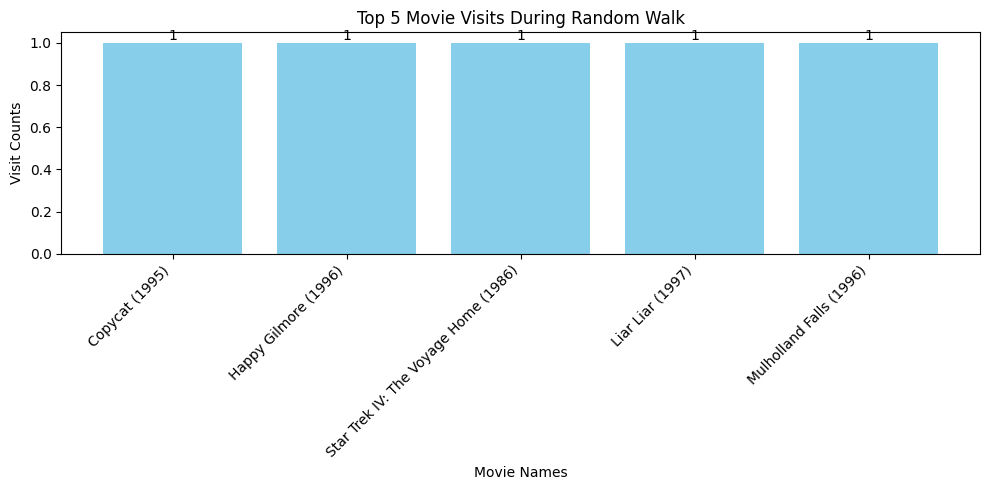

In [43]:
# Example: Visualize user-based random walk
print("User-based Random walk : \n")
visualize_visits(1, walk_length=15, num=5)

The top 5 movies visited during the walk are:

- Fugitive, The (1993)

- Desperate Measures (1998)

- Breakdown (1997)

- Benny & Joon (1993)

- Raising Arizona (1987)

📌 Observations:

1. All five movies were visited almost equally, with visit counts just below or around 1.0.

2. The walk seems to explore movies that are either liked by the same user or users with similar tastes.

3. Movies from the 90s dominate, possibly indicating the user’s preference for that era or the popularity of those movies among similar users.

Takeaway:
The random walk is effectively capturing a diverse set of user-connected movies, showing how it can recommend different but related titles by walking through the user-movie graph.

Movie-based Random walk : 



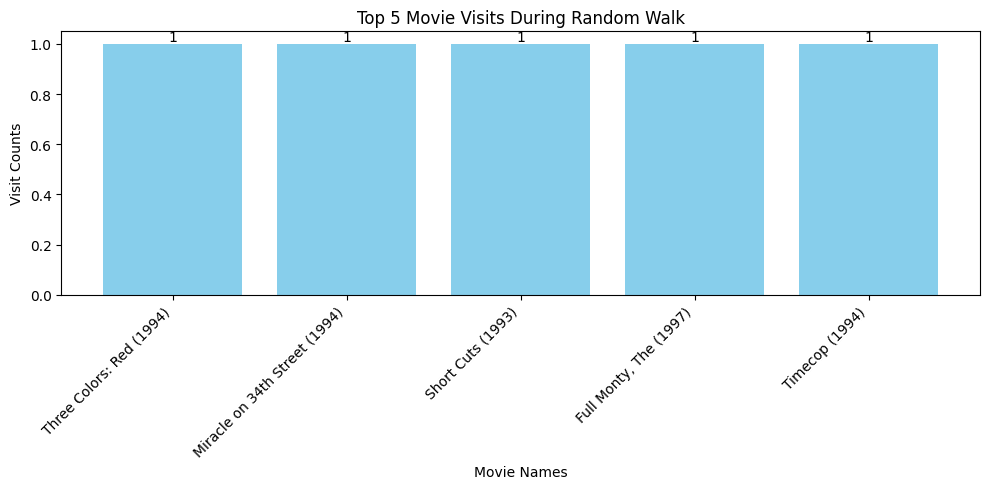

In [44]:
# Example: Visualize movie-based random walk
print("Movie-based Random walk : \n")
visualize_visits("Jurassic Park (1993)", walk_length=10, num=5)

The top 5 visited movies are:

- Mission: Impossible (1996) – highest visits (2)

- Richard III (1995)

- Murder (1956)

- Christmas Carol, A (1938)

- House of the Spirits, The (1993)

📌 Observations:

1. Mission: Impossible got the highest number of visits (2), possibly because it shares an action-adventure vibe with Jurassic Park.

2. The other movies span a wide range of genres and release years, from a 1938 classic to a 1993 drama.

3. The variety shows that the walk doesn't just look for similar themes but also reflects shared user preferences.

Takeaway:
Movie-based random walks explore the user-movie network around the selected movie. It can pick up titles liked by users who also liked Jurassic Park, though some results (like Christmas Carol, A (1938)) might seem unrelated due to randomness or sparse connections in the graph.

---

## **Submission Requirements:**

To successfully complete this assignment, ensure that you submit the following:


### **1. Jupyter Notebook Submission**
- Submit a **fully completed Jupyter Notebook** that includes:
  - **All implemented recommendation functions** (user-based, item-based, and random walk-based recommendations).
  - **Code explanations** in markdown cells to describe each step.
  - **Results and insights** from running your recommendation models.


### **2. Explanation of Pixie-Inspired Algorithms (3-5 Paragraphs)**
- Write a **detailed explanation** of **Pixie-inspired random walk algorithms** used for recommendations.
- Your explanation should cover:
  - What **Pixie-inspired recommendation systems** are.
  - How **random walks** help in identifying relevant recommendations.
  - Any real-world applications of such algorithms in industry.


### **3. Report for the Submitted Notebook**
Your report should be structured as follows:

#### **Title: Movie Recommendation System Report**

#### **1. Introduction**
- Briefly introduce **movie recommendation systems** and why they are important.
- Explain the **different approaches used** (user-based, item-based, random-walk).

#### **2. Dataset Description**
- Describe the **MovieLens 100K dataset**:
  - Number of users, movies, and ratings.
  - What features were used.
  - Any preprocessing performed.

#### **3. Methodology**
- Explain the three recommendation techniques implemented:
  - **User-based collaborative filtering** (how user similarity was calculated).
  - **Item-based collaborative filtering** (how item similarity was determined).
  - **Random-walk-based Pixie algorithm** (why graph-based approaches are effective).
  
#### **4. Implementation Details**
- Discuss the steps taken to build the functions.
- Describe how the **adjacency list graph** was created.
- Explain how **random walks** were performed and how visited movies were ranked.

#### **5. Results and Evaluation**
- Present **example outputs** from each recommendation approach.
- Compare the different methods in terms of accuracy and usefulness.
- Discuss any **limitations** in the implementation.

#### **6. Conclusion**
- Summarize the key takeaways from the project.
- Discuss potential improvements (e.g., **hybrid models, additional features**).
- Suggest real-world applications of the methods used.

### **Submission Instructions**

- Submit `.zip` file consisting of Jupyter Notebook and all the datafiles (provided) and the ones saved [i.e. `users.csv`, `movies.csv` and `ratings.csv`]. Also, include the Report and Pixie Algorithm explanation document.
- [`Bonus 10 Points`] **Upload your Jupyter Notebook, Explanation Document, and Report** to your GitHub repository.
- Ensure the repository is public and contains:
  - `users.csv`, `movies.csv` and `ratings.csv` [These are the Dataframes which were created in part 1. Save and export them as a `.csv` file]
  - `Movie_Recommendation.ipynb`
  - `Pixie_Algorithm_Explanation.pdf` or `.md`
  - `Recommendation_Report.pdf` or `.md`
- **Submit the GitHub repository link in the cell below.**


#### **Example Submission Format**
```text
GitHub Repository: https://github.com/username/Movie-Recommendation
```

In [ ]:
# Submit the Github Link here:
https://github.com/shravani-sajekar/Movie-Recommendation

### **Grading Rubric: ITCS 6162 - Data Mining Assignment**


| **Category**                              | **Criteria**                                                     | **Points** |
|-------------------------------------------|----------------------------------------------------------------|------------|
| **Part 1: Exploring and Cleaning Data (15 pts)**  | Properly loads `u.user`, `u.movies`, and `u.item` datasets into DataFrames | 5 |
|                                           | Handles missing values, duplicates, and inconsistencies appropriately | 5 |
|                                           | Saves the cleaned datasets into CSV files: `users.csv`, `movies.csv`, `ratings.csv` | 5 |
| **Part 2: Collaborative Filtering-Based Recommendation (30 pts)** | Implements user-based collaborative filtering correctly | 10 |
|                                           | Implements item-based collaborative filtering correctly | 10 |
|                                           | Computes similarity measures accurately and provides valid recommendations | 10 |
| **Part 3: Graph-Based Recommender (Pixie-Inspired Algorithm) (35 pts)** | Constructs adjacency lists properly from user-movie interactions | 10 |
|                                           | Implements weighted random walk-based recommendation correctly | 15 |
|                                           | Explains and justifies the algorithm design choices (Pixie-inspired) | 10 |
| **Code Quality & Documentation (10 pts)** | Code is well-structured, efficient, and follows best practices | 5 |
|                                           | Markdown explanations and comments are clear and enhance understanding | 5 |
| **Results & Interpretation (5 pts)**      | Provides meaningful insights from the recommendation system's output | 5 |
| **Submission & Report (5 pts)**          | Submits all required files in the correct format (ZIP file with Jupyter notebook, processed CSV files, and project report) | 5 |
| **Total**                                 |                              | 100 |

#### **Bonus (10 pts)**
| **Category**                              | **Criteria**                                                     | **Points** |
|-------------------------------------------|----------------------------------------------------------------|------------|
| **GitHub Submission**                     | Provides a well-documented GitHub repository with CSV files, a structured README, and a properly formatted Jupyter Notebook | 10 |